In [8]:
import pandas as pd
import numpy as np


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                             GradientBoostingClassifier)
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
data=pd.read_csv('/Users/Brenton/BB_project/clean_master-2.csv', index_col = 0, low_memory=False)
data.shape

(2169466, 52)

#### Split "data" into 1) training+validation and 2) test sets

#### Once this split is completed, I dropped the "year" and "month" columns, because they aren't used in the actual model.

In [37]:
model_data = data[(data['year'] != 2016)]
test_data = data[data['year'] == 2016]

model_data = model_data.drop(['year', 'Months'], 1)
test_data = test_data.drop(['year', 'Months'], 1)

length = len(model_data)
length

1430361

In [42]:
model_data.head()

,pit_hand_cd,bat_hand_cd,pa_ball_ct,pa_strike_ct,outs_ct,pitch_type,n-1_pitch_type,n-2_pitch_type,n-3_pitch_type,n-1_pitch,n-2_pitch,n-3_pitch,cum_pitch_count,batter_position,AVG,OBP,SLG,SWING_RT,CONTACT_RT,O_SWING_RT,O_CONTACT_RT,Pitches_Per_PA,Pitcher_Age,HR9,UBBr,SOr,SO/BB,WHIP,ERA,FB%,GB%,LD%,POP%,pct_FF,pct_FT,pct_FC,pct_SI,pct_CH,pct_CU,pct_SL,pct_KC,score_position,isMiss_n-1_pit_type,isMiss_n-2_pit_type,isMiss_n-3_pit_type,isMiss_n-1_pit_resut,isMiss_n-2_pit_resut,isMiss_n-3_pit_resut,isMiss_pit_feat,isMiss_bat_feat
0,1,0,0,0,0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,1,1,0.254,0.349,0.427,0.439,0.7793,0.3067,0.7162,4.059091,27.0,0.9,0.084,0.186,2.18,1.36,4.18,0.1893,0.5143,0.2643,0.0321,0.331252,0.182714,0.001972,0.0,0.017746,0.209333,0.255012,0.0,0,1,1,1,1,1,1,0,0
1,1,0,1,0,0,1.0,1.0,9.0,9.0,1.0,9.0,9.0,2,1,0.254,0.349,0.427,0.439,0.7793,0.3067,0.7162,4.059091,27.0,0.9,0.084,0.186,2.18,1.36,4.18,0.1893,0.5143,0.2643,0.0321,0.331252,0.182714,0.001972,0.0,0.017746,0.209333,0.255012,0.0,0,0,1,1,1,1,1,0,0
2,1,0,2,0,0,1.0,1.0,1.0,9.0,1.0,1.0,9.0,3,1,0.254,0.349,0.427,0.439,0.7793,0.3067,0.7162,4.059091,27.0,0.9,0.084,0.186,2.18,1.36,4.18,0.1893,0.5143,0.2643,0.0321,0.331252,0.182714,0.001972,0.0,0.017746,0.209333,0.255012,0.0,0,0,0,1,0,0,1,0,0
3,1,1,0,0,0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,4,2,0.184,0.268,0.289,0.463,0.6562,0.2601,0.5205,3.845291,27.0,0.9,0.084,0.186,2.18,1.36,4.18,0.1893,0.5143,0.2643,0.0321,0.331252,0.182714,0.001972,0.0,0.017746,0.209333,0.255012,0.0,0,1,1,1,1,1,1,0,0
4,1,1,1,0,0,2.0,1.0,9.0,9.0,1.0,9.0,9.0,5,2,0.184,0.268,0.289,0.463,0.6562,0.2601,0.5205,3.845291,27.0,0.9,0.084,0.186,2.18,1.36,4.18,0.1893,0.5143,0.2643,0.0321,0.331252,0.182714,0.001972,0.0,0.017746,0.209333,0.255012,0.0,0,0,1,1,1,1,1,0,0


In [ ]:
#data = data.drop('Unnamed: 0.1',1)

#### Minor edit here - used the name "data_validation", NOT "data_test" 

In [39]:
#split train and validation sample
rand = list(range(length))
split= int(length*0.8)
np.random.shuffle(rand)
train_index=rand[:split]
validation_index=rand[split:]
data_train=model_data.iloc[train_index,:]
data_validation=model_data.iloc[validation_index,:]
lab = 'pitch_type'

In [40]:
len(data_validation), len(data_train)

(286073, 1144288)

In [41]:
data_validation.head()

,pit_hand_cd,bat_hand_cd,pa_ball_ct,pa_strike_ct,outs_ct,pitch_type,n-1_pitch_type,n-2_pitch_type,n-3_pitch_type,n-1_pitch,n-2_pitch,n-3_pitch,cum_pitch_count,batter_position,AVG,OBP,SLG,SWING_RT,CONTACT_RT,O_SWING_RT,O_CONTACT_RT,Pitches_Per_PA,Pitcher_Age,HR9,UBBr,SOr,SO/BB,WHIP,ERA,FB%,GB%,LD%,POP%,pct_FF,pct_FT,pct_FC,pct_SI,pct_CH,pct_CU,pct_SL,pct_KC,score_position,isMiss_n-1_pit_type,isMiss_n-2_pit_type,isMiss_n-3_pit_type,isMiss_n-1_pit_resut,isMiss_n-2_pit_resut,isMiss_n-3_pit_resut,isMiss_pit_feat,isMiss_bat_feat
1019201,1,1,1,2,1,2.0,6.0,6.0,2.0,3.0,1.0,3.0,60,6,0.235,0.293,0.415,0.4918,0.6950,0.3369,0.5317,3.701657,26.0,1.040927,0.08223,0.197993,2.585728,1.30,3.87,0.248915,0.445141,0.229734,0.071781,0.358456,0.121086,0.056126,0.092324,0.100703,0.077817,0.141837,0.022735,0,0,0,0,0,0,0,1,0
785968,0,0,1,2,0,1.0,7.0,6.0,1.0,4.0,1.0,3.0,47,2,0.255,0.390,0.409,0.3955,0.7935,0.2094,0.6357,4.275735,30.0,0.660000,0.05400,0.249000,4.580000,1.10,2.46,0.235300,0.446100,0.223900,0.094800,0.464848,0.000000,0.254984,0.091028,0.030693,0.157922,0.000000,0.000000,0,0,0,0,0,0,0,0,0
1362099,1,0,0,1,2,1.0,5.0,9.0,9.0,0.0,9.0,9.0,11,3,0.270,0.318,0.398,0.4834,0.8183,0.3606,0.7160,3.808044,26.0,1.040927,0.08223,0.197993,2.585728,1.30,3.87,0.248915,0.445141,0.229734,0.071781,0.358456,0.121086,0.056126,0.092324,0.100703,0.077817,0.141837,0.022735,0,0,1,1,1,1,1,1,0
789982,0,1,1,2,1,6.0,6.0,6.0,6.0,1.0,4.0,3.0,20,6,0.279,0.324,0.415,0.5830,0.8245,0.4520,0.7911,3.446708,26.0,0.470000,0.08100,0.218000,2.700000,0.90,1.65,0.085400,0.758800,0.135700,0.020100,0.007608,0.000000,0.000000,0.898563,0.000000,0.000000,0.084531,0.000000,1,0,0,0,0,0,0,0,0
310153,0,1,2,2,1,5.0,1.0,5.0,8.0,4.0,3.0,1.0,34,1,0.260,0.312,0.375,0.5077,0.7921,0.3657,0.6498,3.605556,30.0,1.020000,0.06800,0.169000,2.370000,1.39,4.02,0.256200,0.417400,0.229300,0.097100,0.368818,0.191534,0.011735,0.000000,0.275356,0.000419,0.000000,0.147946,1,0,0,0,0,0,0,0,0


### Random Forests 

In [44]:
#random forest
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', oob_score = True, n_jobs = -1,random_state =50, 
                                max_features = None, min_samples_leaf = 100)
rf_clf.fit(data_train.drop(lab,1), data_train[lab])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=50, verbose=0, warm_start=False)

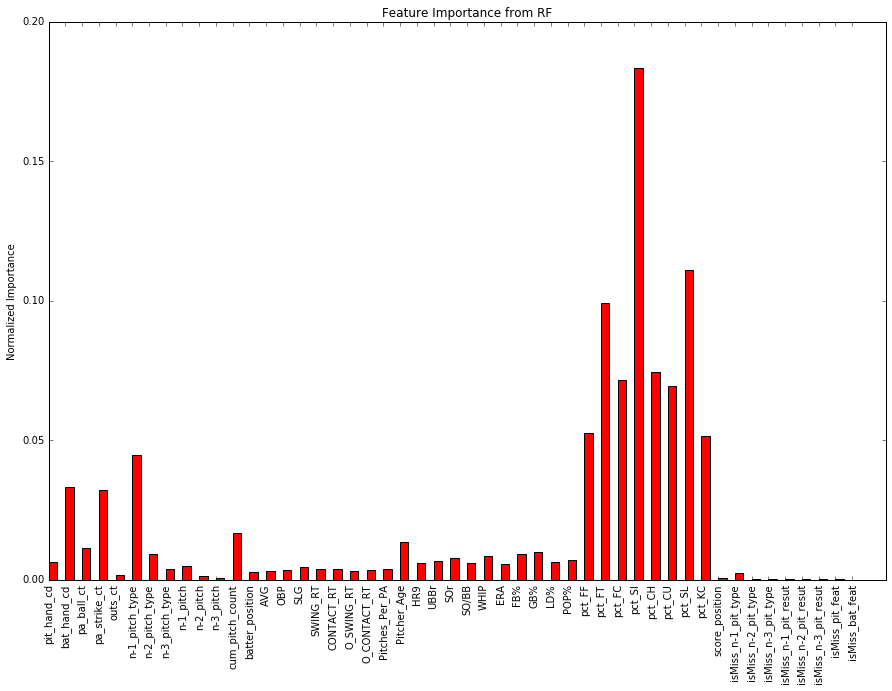

In [45]:
fig, ax = plt.subplots(figsize=(15, 10))
width=0.5
ax.bar(np.arange(len(data.columns)-3), rf_clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(rf_clf.feature_importances_)))
ax.set_xticklabels(data_train.drop(lab,1).columns.values,rotation=90)
plt.title('Feature Importance from RF')
ax.set_ylabel('Normalized Importance')

In [46]:
rf_clf.score(data_validation.drop(lab,1), data_validation[lab])

0.49187445162598359

In [47]:
prediction = rf_clf.predict(data_validation.drop(lab,1))  == data_validation[lab]
prediction.value_counts()

False    145361
True     140712
Name: pitch_type, dtype: int64

### Decision Trees 

In [59]:
#decision tree
from sklearn import tree

#dt_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state =50, max_features = None, min_samples_leaf = 100)
dt_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state =50, max_features = None)
dt_clf = dt_clf.fit(data_train.drop(lab,1),data_train[lab])

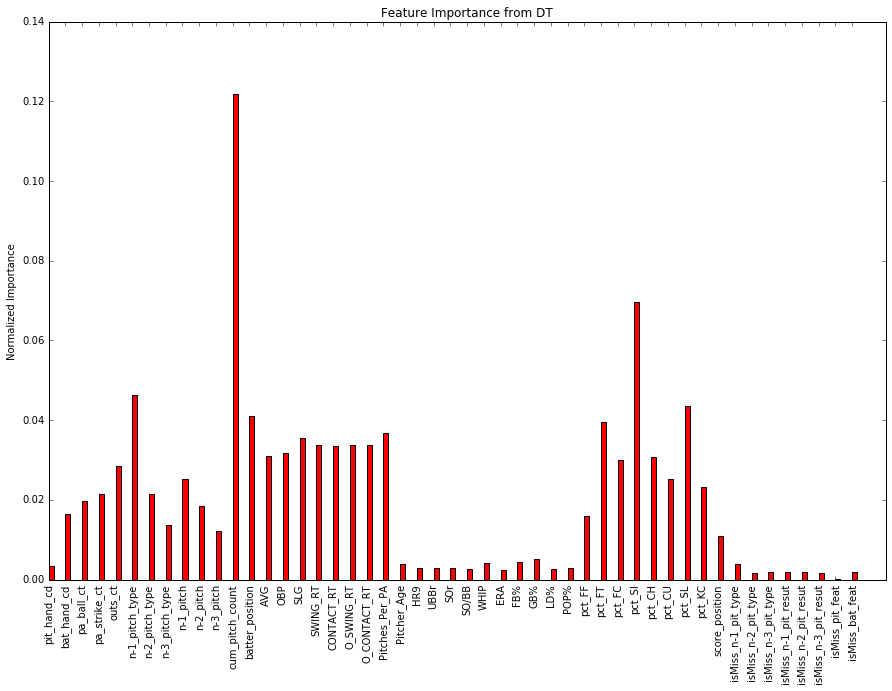

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
width=0.3
ax.bar(np.arange(len(data.columns)-3), dt_clf.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(dt_clf.feature_importances_)))
ax.set_xticklabels(data_train.drop(lab, 1).columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Importance')

In [61]:
dt_clf.score(data_validation.drop(lab,1), data_validation[lab])

0.39232992977316977

In [50]:
prediction = dt_clf.predict(data_validation.drop(lab,1)) == data_validation[lab]
prediction.value_counts()

False    147762
True     138311
Name: pitch_type, dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dt_clf.predict(data_validation.drop(lab,1)), data_validation[lab])
acc = (cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6]+cm[7][7]+cm[8][8])/float(sum(sum(cm)))
print ("For data_validation, the test accuracy is", acc)

For data_validation, the test accuracy is 0.392329929773


In [52]:
cm

array([[ 3247,   991,   294,   279,   187,    42,   251,   309,     1],
       [ 2455, 74628, 18926, 13282, 11348, 14403,  2720,  6233,  2676],
       [  266,  7298, 11610,  2977,  1294,  1355,  1521,   453,   113],
       [  579,  6742,  3698, 15846,  2601,  4366,   446,  1157,   700],
       [   74,  2109,   715,   962,  3350,   720,   481,   607,     3],
       [   61,  2891,   904,  1655,   880,  4379,   750,   548,   294],
       [  710,  2804,  4344,   324,  1675,  3579, 18538,  1338,   907],
       [  325,  2280,   500,   842,  1010,   877,   520,  5407,   384],
       [    3,   763,    57,   204,     2,   242,   297,   158,  1306]])

In [66]:
minleaf_sizes = [10, 20, 50, 70, 100, 120, 150]
minsplit_sizes = [2]
maxdepth_sizes = [20]


for x in minleaf_sizes: 
    for y in minsplit_sizes: 
        for z in maxdepth_sizes: 
            dt_clf = tree.DecisionTreeClassifier(criterion='entropy', random_state =50, min_samples_leaf = x, 
                                                 min_samples_split = y, max_depth = z )
            dt_clf = dt_clf.fit(data_train.drop(lab,1),data_train[lab])
            print(dt_clf.score(data_validation.drop(lab,1), data_validation[lab]), x, y, z)
            

0.458697605157 10 2 20
0.468303544899 20 2 20
0.480279509076 50 2 20
0.482198599658 70 2 20
0.483883484285 100 2 20
0.48314591031 120 2 20
0.482464266114 150 2 20


### Logistic Regression 

In [55]:
#logistic regression
lr = LogisticRegression(C = 1e30, multi_class='multinomial',solver = 'newton-cg', n_jobs = -1,random_state =50)
lr.fit(data_train.drop(lab,1), data_train[lab])

Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/Brenton/anaconda/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/Brenton/anaconda/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/Brenton/anaconda/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(data_train[lab], lr.predict(data_train.drop(lab,1)))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
OVR = OneVsRestClassifier(LogisticRegression()).fit(data_train.drop(lab,1), data_train[lab])
#OVO = OneVsOneClassifier(LogisticRegression()).fit(data_train.drop(lab,1), data_train[lab])

print ('One vs rest accuracy: %.3f' % OVR.score(data_validation.drop(lab,1), data_validation[lab]))
#print ('One vs one accuracy: %.3f' % OVO.score(data_validation.drop(lab,1), data_validation[lab]))


In [ ]:
#logloss matrics for multiclass
#global, pitcher-base
#cluster pitchers
#feaeture engineering
#LR for single pitcher vs. RF. Nonlinearity
#proof of chosing final model, by: charts(feature importance), graphs, tables, accuracy, logloss
#percesion analysis:degsign a matrix to set a threshold for whether make a prediction.
#decision function, process 
